# Statistics Assignment #2 - IGN Game Data
Oct 13, 2016, By Nick Crawford

In [1]:
%matplotlib inline
import pandas as pd
import seaborn as sns

# use an encoding to deal with invisible heading characters known as BOM(byte order mark)
data = pd.read_csv("IGN_game_ratings.txt", sep="\t", encoding="utf-8-sig")

In [6]:
data[data.Score==3]

,Game,Platform,Score,Genre
89,Basement Crawl,PlayStation 4,3.0,Action
123,Rekoil,PC,3.0,Shooter
367,Dragon Fantasy Book II,PlayStation 3,3.0,RPG
368,Dragon Fantasy Book II,PlayStation Vita,3.0,RPG
808,Infestation: Survivor Stories,PC,3.0,Action
861,ESPN Sports Connection,Wii U,3.0,Sports
1119,Double Dragon: Neon,PlayStation 3,3.0,Fighting
1120,Double Dragon: Neon,Xbox 360,3.0,Fighting
1220,Dungeon Twister,PlayStation 3,3.0,Board
1272,Steel Battalion: Heavy Armor,Xbox 360,3.0,"Action, Simulation"


## Question 1
(5 marks) Descriptive statistics:
- Construct a histogram showing the frequency distribution of the scores. 
- Determine the top 10 (most common) genres.
- Determine the top 10 (most common) platforms.
- Determine the z-score of “The Legend of Zelda: Twilight Princess”.

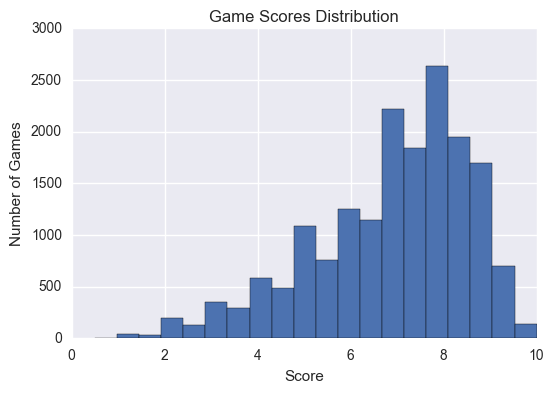

In [142]:
# Construct a histogram showing the frequency distribution of the scores.
plot1=data["Score"].hist(bins=20)
plot1.set_title("Game Scores Distribution")
plot1.set_xlabel("Score")
plot1.set_ylabel("Number of Games")

In [143]:
# Determine the top 10 (most common) genres.
print(data.groupby('Genre').size().sort_values(ascending=False)[:10])

Genre
Action               3628
Sports               1854
Shooter              1472
Racing               1189
Strategy             1013
Adventure            1012
RPG                   866
Platformer            777
Puzzle                748
Action, Adventure     719
dtype: int64


In [144]:
# Determine the top 10 (most common) platforms.
print(data.groupby('Platform').size().sort_values(ascending=False)[:10])

Platform
PC               3026
PlayStation 2    1683
Xbox 360         1582
Wii              1347
PlayStation 3    1295
Nintendo DS      1040
PlayStation       952
Wireless          905
Xbox              822
iPhone            815
dtype: int64


In [145]:
# Determine the z-score of “The Legend of Zelda: Twilight Princess”.
mean = data.Score.mean()
stdev=data.Score.std()

# gets the first game returned with that name
score=data[data.Game == "The Legend of Zelda: Twilight Princess"].Score.iloc[0]

# zscore
print((score-mean)/stdev)

1.50161461125


## Question 2
(5 marks) If a game is randomly selected from this list, determine the probability that: 
- The game has a score greater than 8.
- The game is a shooter with a score less than 5.
- The game is a Wii strategy game or a Wii puzzle game.
- The game is an action game, given that the game is for Xbox 360 or PC.

In [146]:
# Probability the game has a score greater than 8.
pgreaterThanEight = len(data[data.Score > 8])/len(data.Score)
pgreaterThanEight

0.2556176571233033

In [147]:
# Probability the game is a shooter with a score less than 5.
probLessThanFiveAndShooter = len(data[(data.Score < 5) & (data.Genre.str.contains('Shooter'))])/len(data)
print(probLessThanFiveAndShooter)

0.01066499372647428


In [148]:
# Probability the game is a Wii strategy or Wii puzzle game
# But, each game genre is not exclusively strategy or puzzle, for ex. (Strategy, Puzzle) is allowed
probWiiStrategyOrPuzzle = len(data[((data.Platform=="Wii") & (data.Genre.str.contains("Strategy"))) |
                                   ((data.Platform=='Wii') & (data.Genre.str.contains("Puzzle")))]) / \
                                     len(data)
print(probWiiStrategyOrPuzzle)

0.007585262917759781


In [166]:
# Probability the game is an action game, given that the game is for Xbox 360 or PC
# using P(A and B) = P(A) x P(B|A). Solving for P(B|A)

#A
platformIsXboxOrPc = data[(data.Platform=="Xbox 360") | (data.Platform=="PC")]

#B
actionGame = data[data.Genre.str.contains("Action")]

#A and B
both = data[((data.Platform=="Xbox 360") | (data.Platform=="PC")) & (data.Genre.str.contains("Action"))]

probBoth = len(both)/len(data)
probA=len(platformIsXboxOrPc)/len(data)
result=probBoth/probA

print(result)

0.2660590277777778
